Scenario 1: Multinomial Naïve Bayes for SMS Spam Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

--- MODEL PERFORMANCE ---
Accuracy:  0.9803
Precision: 0.9267
Recall:    0.9267
F1 Score:  0.9267

--- MISCLASSIFIED EXAMPLES (First 3) ---
Actual: ham, Predicted: spam
Message: K:)eng rocking in ashes:)

Actual: ham, Predicted: spam
Message: I liked the new mobile

Actual: ham, Predicted: spam
Message: Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........

Accuracy with Laplace Smoothing (alpha=0.1): 0.9749



C:\Users\HP\AppData\Local\Temp\ipykernel_21556\4098221606.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.exp(spam_log_probs[top_spam_indices]), y=feature_names[top_spam_indices], palette='Reds_r')


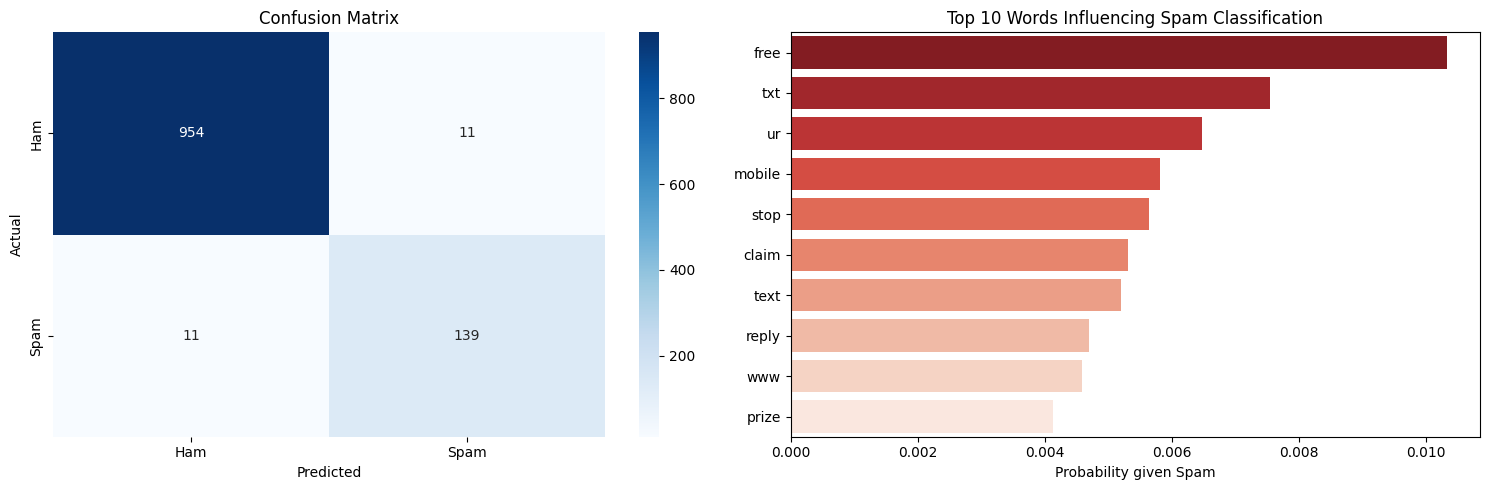

In [2]:
# SHAQEEQ 24BAD109

# 1. Load the SMS Spam dataset (Kaggle dataset uses latin-1 encoding)
try:
    df = pd.read_csv("C:\\Users\\HP\\Downloads\\archive(16)\\spam.csv", encoding='latin-1')
    df = df[['v1', 'v2']]
    df.columns = ['label', 'message']
except FileNotFoundError:
    print("Please download 'spam.csv' from Kaggle and place it in the same directory.")
    exit()

# 2. Encode target labels (Ham: 0, Spam: 1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Data Preprocessing & Vectorization
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

# 4. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train a Multinomial Naïve Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 6. Predict message classes
y_pred = nb_model.predict(X_test)

# 7. Evaluate performance
print("--- MODEL PERFORMANCE ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}\n")

# 8. Analyze misclassified examples
misclassified_indices = np.where(y_test != y_pred)[0]
print("--- MISCLASSIFIED EXAMPLES (First 3) ---")
for idx in misclassified_indices[:3]:
    original_idx = y_test.index[idx]
    print(f"Actual: {df['label'].iloc[original_idx]}, Predicted: {'spam' if y_pred[idx]==1 else 'ham'}")
    print(f"Message: {df['message'].iloc[original_idx]}\n")

# 9. Apply Laplace smoothing and observe impact
nb_model_smooth = MultinomialNB(alpha=0.1) # Changed alpha for smoothing impact
nb_model_smooth.fit(X_train, y_train)
y_pred_smooth = nb_model_smooth.predict(X_test)
print(f"Accuracy with Laplace Smoothing (alpha=0.1): {accuracy_score(y_test, y_pred_smooth):.4f}\n")

# 10. VISUALIZATIONS
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Visualization B: Feature Importance (Top words influencing Spam)
plt.subplot(1, 2, 2)
# Get log probabilities of features for the Spam class (index 1)
spam_log_probs = nb_model.feature_log_prob_[1]
feature_names = np.array(vectorizer.get_feature_names_out())
# Sort indices by probability
top_spam_indices = spam_log_probs.argsort()[-10:][::-1]
sns.barplot(x=np.exp(spam_log_probs[top_spam_indices]), y=feature_names[top_spam_indices], palette='Reds_r')
plt.title('Top 10 Words Influencing Spam Classification')
plt.xlabel('Probability given Spam')

plt.tight_layout()
plt.show()


Scenario 2: Gaussian Naïve Bayes for Iris Classification

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay


--- GAUSSIAN NAÏVE BAYES PERFORMANCE ---
Accuracy: 0.9778

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

--- CLASS PROBABILITIES (First 3 Test Samples) ---
Sample 1: Setosa: 0.0000, Versicolor: 0.9955, Virginica: 0.0045
Predicted: versicolor, Actual: versicolor

Sample 2: Setosa: 1.0000, Versicolor: 0.0000, Virginica: 0.0000
Predicted: setosa, Actual: setosa

Sample 3: Setosa: 0.0000, Versicolor: 0.0000, Virginica: 1.0000
Predicted: virginica, Actual: virginica

Logistic Regression Accuracy: 1.0000



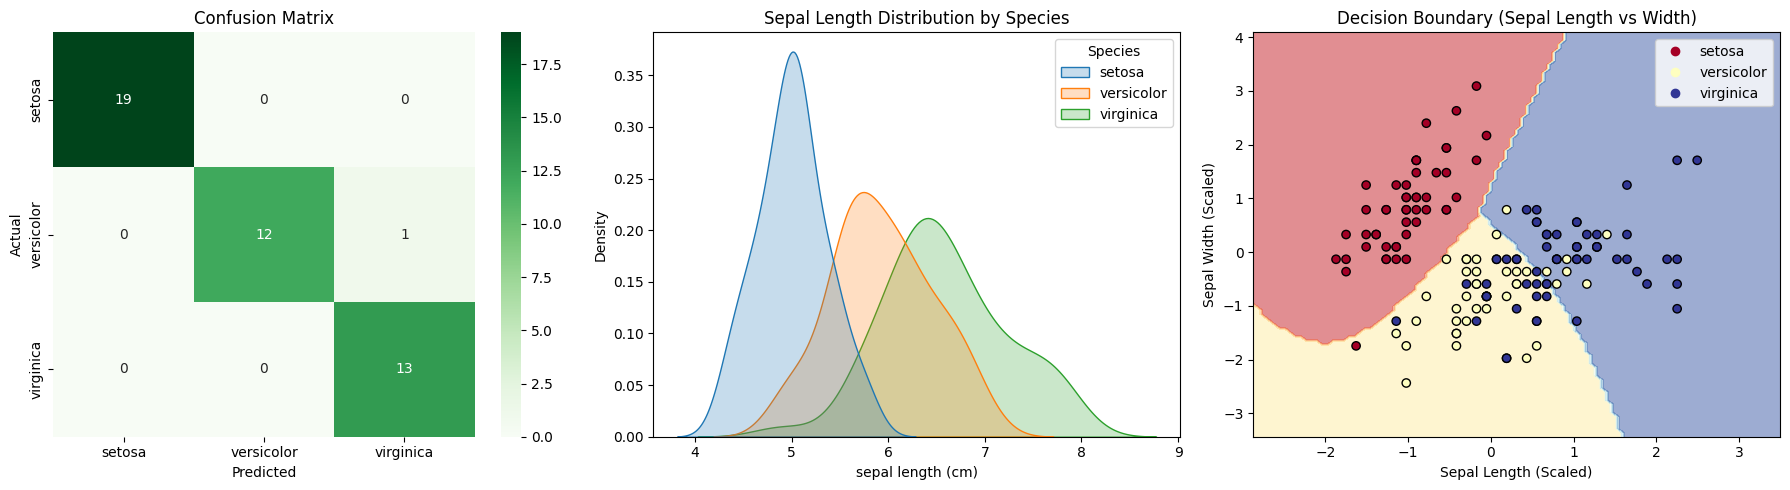

In [4]:


# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Perform data inspection & preprocessing (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Train a Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 5. Predict species labels & Evaluate performance
y_pred = gnb.predict(X_test)
print("--- GAUSSIAN NAÏVE BAYES PERFORMANCE ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 6. Analyze class probabilities
probabilities = gnb.predict_proba(X_test)
print("--- CLASS PROBABILITIES (First 3 Test Samples) ---")
for i in range(3):
    print(f"Sample {i+1}: Setosa: {probabilities[i][0]:.4f}, Versicolor: {probabilities[i][1]:.4f}, Virginica: {probabilities[i][2]:.4f}")
    print(f"Predicted: {target_names[y_pred[i]]}, Actual: {target_names[y_test[i]]}\n")

# 7. Compare Gaussian NB with Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.4f}\n")

# 8. VISUALIZATIONS
plt.figure(figsize=(18, 5))

# Visualization A: Confusion Matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Visualization B: Probability distribution plots (Feature distribution)
plt.subplot(1, 3, 2)
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['Species'] = [target_names[i] for i in y]
sns.kdeplot(data=iris_df, x='sepal length (cm)', hue='Species', fill=True)
plt.title('Sepal Length Distribution by Species')

# Visualization C: Decision Boundary Plot (Using only first 2 features for 2D plot)
plt.subplot(1, 3, 3)
X_2d = X_scaled[:, :2]
gnb_2d = GaussianNB().fit(X_2d, y)

DecisionBoundaryDisplay.from_estimator(
    gnb_2d, X_2d, response_method="predict",
    cmap=plt.cm.RdYlBu, alpha=0.5, ax=plt.gca()
)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.legend(handles=scatter.legend_elements()[0], labels=list(target_names))
plt.title('Decision Boundary (Sepal Length vs Width)')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')

plt.tight_layout()
plt.show()

     
